<a href="https://colab.research.google.com/github/Arsh-e-Barin-Khurshid/Arsh-e-Barin-Khurshid-CognoRise-InfoTech-TASK-3-BREAST-CANCER-CLASSIFICATION-ML/blob/main/BREAST_CANCER_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***BREAST CANCER CLASSIFICATION***

In [37]:
!pip install --upgrade tensorflow

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
from PIL import Image
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

In [13]:
!unzip /content/archive\ \(4\).zip -d /content/xray_images

Archive:  /content/archive (4).zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/archive (4).zip or
        /content/archive (4).zip.zip, and cannot find /content/archive (4).zip.ZIP, period.


In [18]:
from google.colab import files
import zipfile
import os

# Upload the ZIP file
uploaded = files.upload()

# Unzip the uploaded file
zip_file_path = list(uploaded.keys())[0]  # Get the uploaded file's name
unzip_dir = '/content/xray_images'
os.makedirs(unzip_dir, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)

# List the extracted files
print(os.listdir(unzip_dir)[:5])


Saving archive (4).zip to archive (4) (1).zip
['Dataset_BUSI_with_GT']


In [24]:
import pandas as pd

# Load the CSV file containing labels
csv_file_path = '/content/breast-cancer.csv'
df = pd.read_csv(csv_file_path)

# Display the first few rows of the dataset
print(df.head())

# Check the columns in the dataframe
print(df.columns)

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

In [22]:
import os

# List contents of the xray_images directory
xray_images_dir = '/content/xray_images'
for root, dirs, files in os.walk(xray_images_dir):
    print(f"Root: {root}")
    print(f"Directories: {dirs}")
    print(f"Files: {files}")
    print()

Root: /content/xray_images
Directories: ['Dataset_BUSI_with_GT']
Files: []

Root: /content/xray_images/Dataset_BUSI_with_GT
Directories: ['benign', 'malignant', 'normal']
Files: []

Root: /content/xray_images/Dataset_BUSI_with_GT/benign
Directories: []
Files: ['benign (135)_mask.png', 'benign (227)_mask.png', 'benign (329).png', 'benign (173)_mask.png', 'benign (149)_mask.png', 'benign (20).png', 'benign (291).png', 'benign (187)_mask.png', 'benign (226).png', 'benign (142).png', 'benign (184).png', 'benign (307).png', 'benign (21).png', 'benign (177).png', 'benign (127)_mask.png', 'benign (58)_mask_1.png', 'benign (94)_mask.png', 'benign (64).png', 'benign (9).png', 'benign (185)_mask.png', 'benign (124)_mask.png', 'benign (79)_mask.png', 'benign (288)_mask.png', 'benign (146)_mask.png', 'benign (354)_mask.png', 'benign (155)_mask.png', 'benign (105)_mask.png', 'benign (241)_mask.png', 'benign (148)_mask.png', 'benign (421).png', 'benign (115).png', 'benign (52)_mask.png', 'benign (33

In [58]:
# EDA

# Check for missing values
print("Checking for missing values:")
print(df.isnull().sum())

# Map diagnosis to numeric values
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Drop the 'id' column and separate features and target variable
X = df.drop(columns=['id', 'diagnosis'])
y = df['diagnosis']

# Check for missing values in features
print("Checking for missing values in features:")
print(X.isnull().sum())

# Drop rows with missing values in features, if any
X = X.dropna()
y = y.loc[X.index]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Checking for missing values:
id                           0
diagnosis                  569
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_di

<Figure size 2000x2000 with 0 Axes>

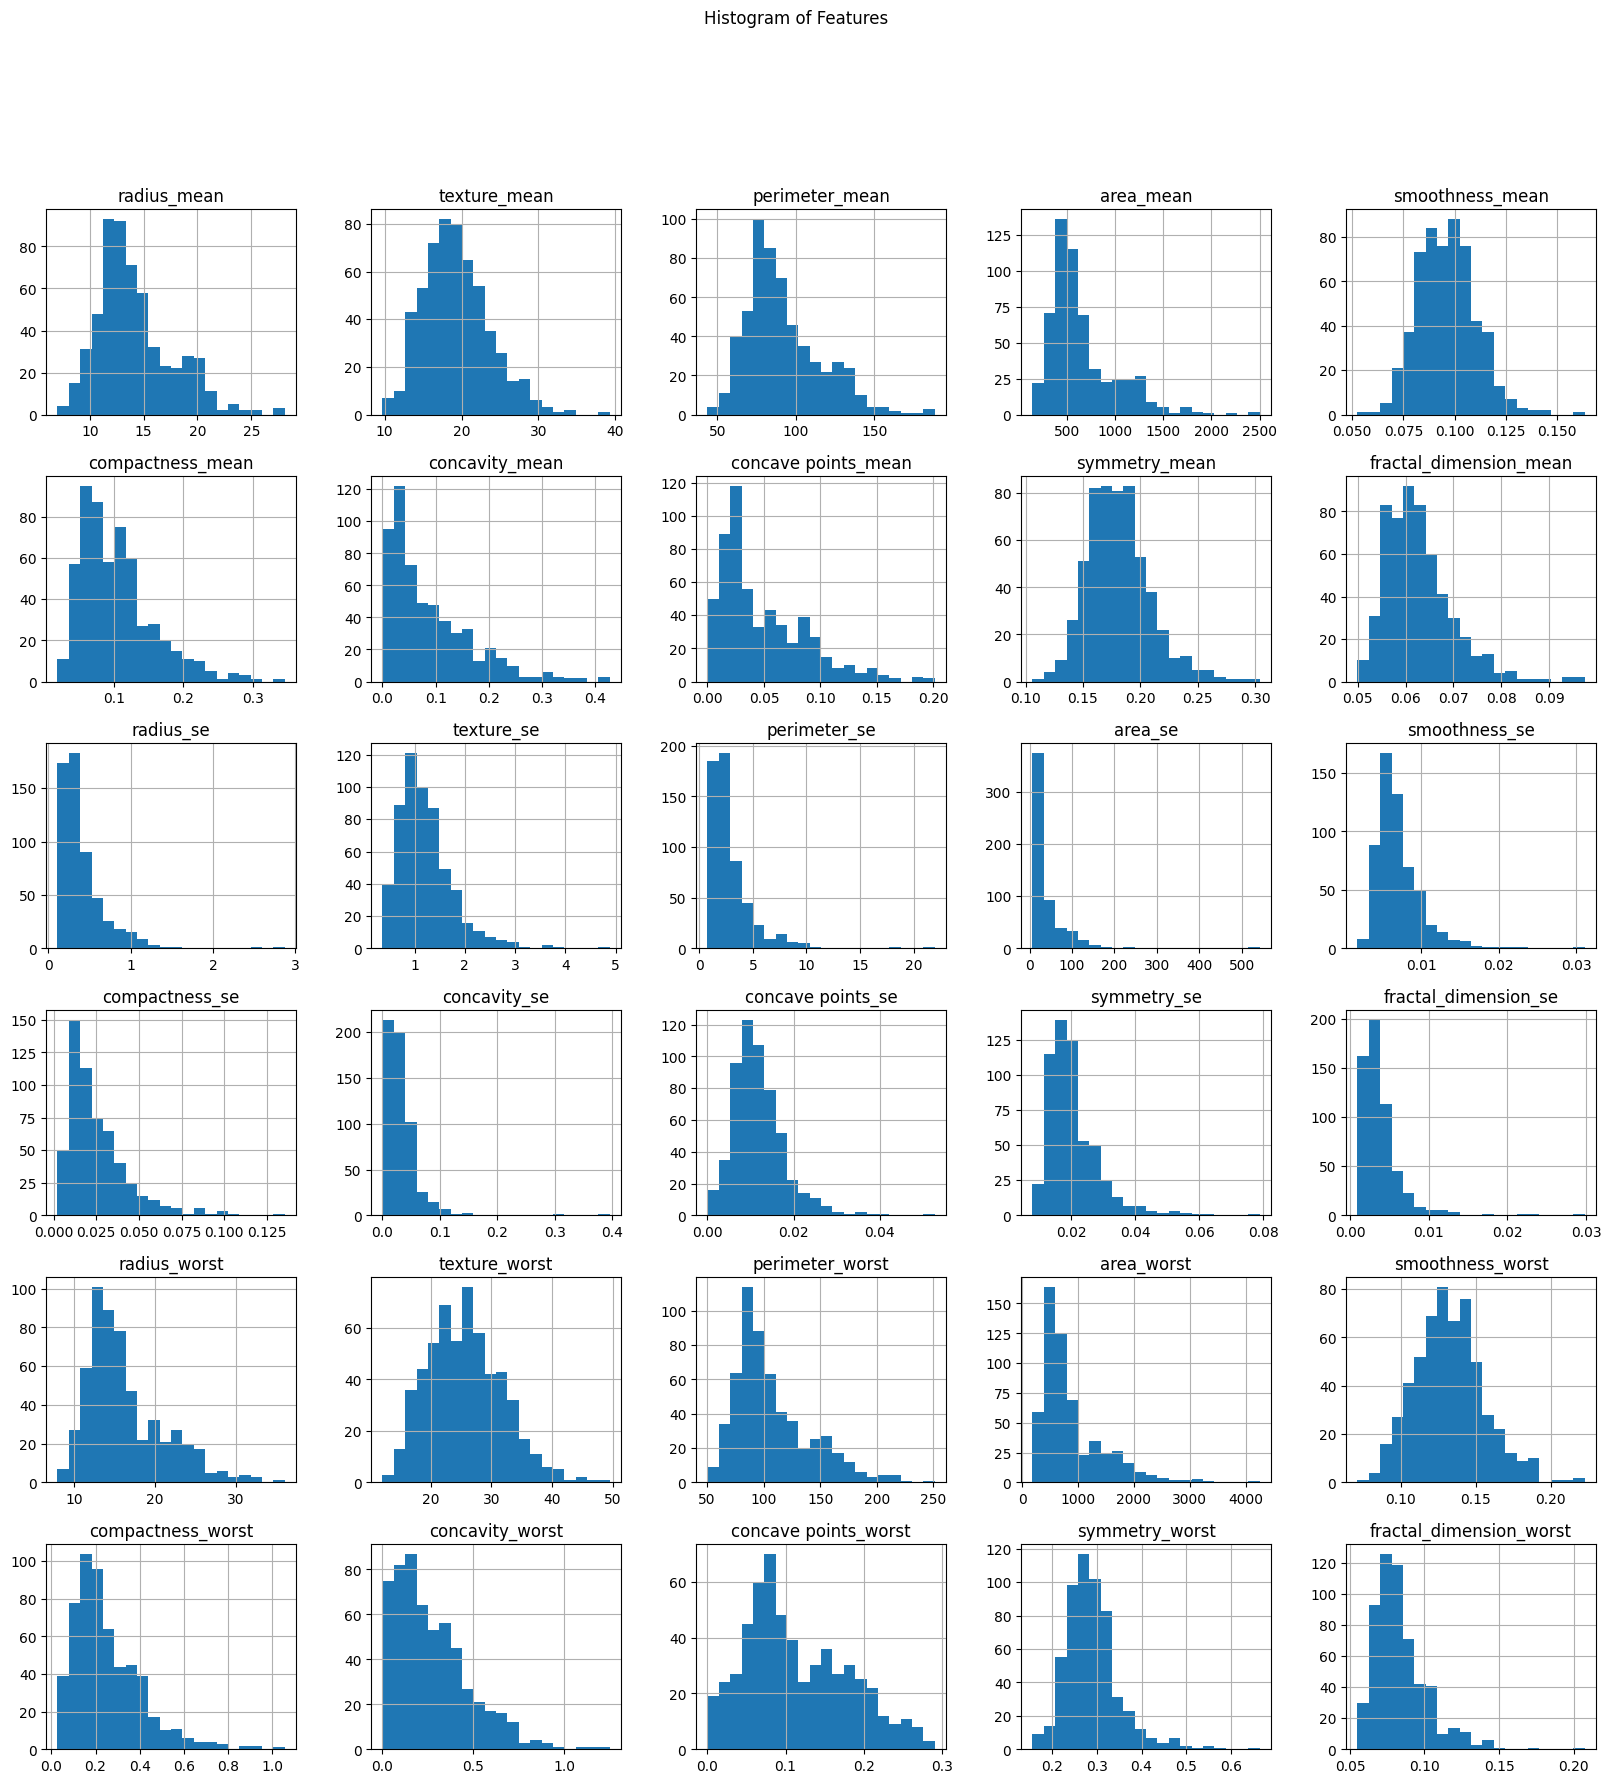

In [59]:
# Histogram of feature distributions
df_features = df.drop(columns=['diagnosis', 'id'])
plt.figure(figsize=(20, 20))
df_features.hist(bins=20, figsize=(20, 20))
plt.suptitle('Histogram of Features')
plt.show()

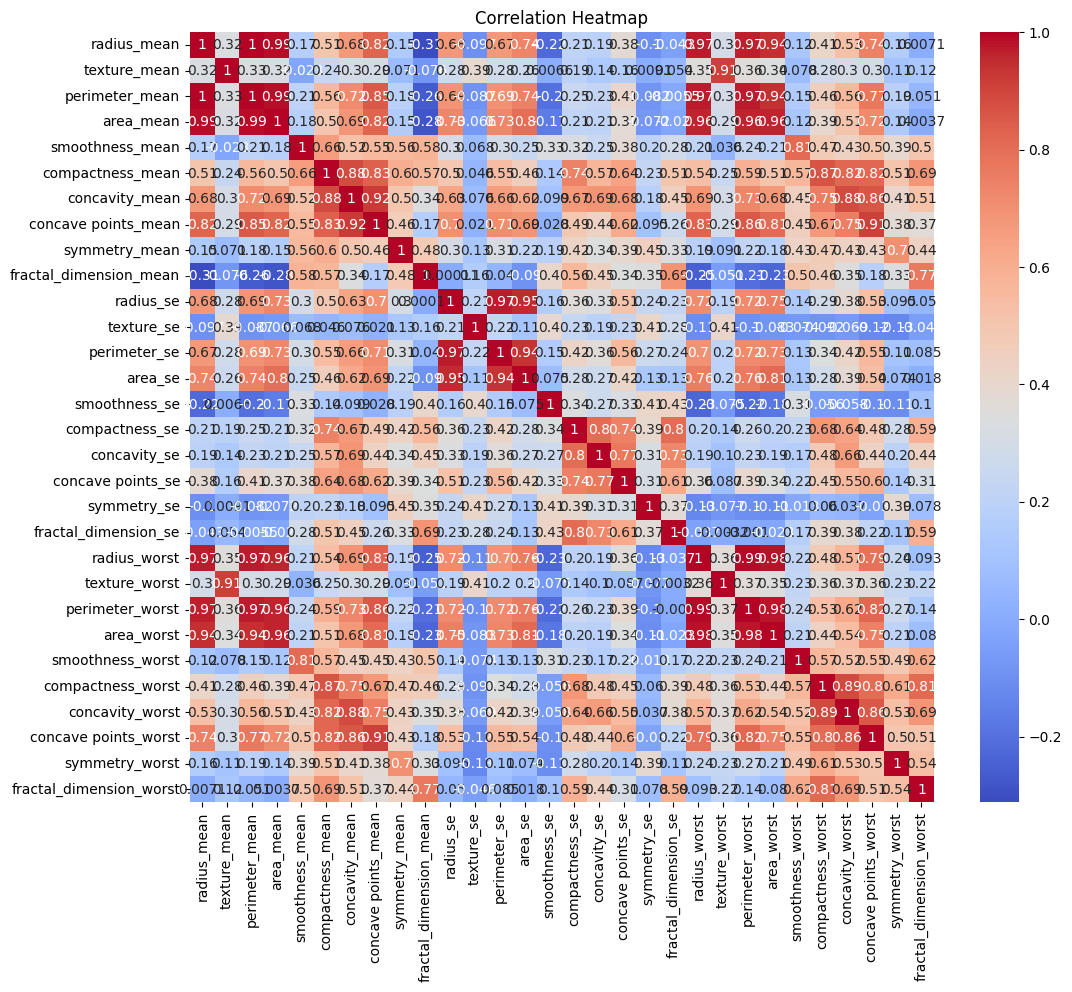

In [60]:
# Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_features.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [73]:
# Map diagnosis to numeric values
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Drop rows with NaN values in the target variable
df_clean = df.dropna(subset=['diagnosis'])

# Drop columns that are not needed and separate features and target variable
X = df_clean.drop(columns=['id', 'diagnosis'])
y = df_clean['diagnosis']

# Ensure y contains only numeric values
print("Unique values in y:", y.unique())

# Display the shapes and some sample data
print("X shape:", X.shape)
print("y shape:", y.shape)
print("X head:\n", X.head())
print("y head:\n", y.head())


Unique values in y: [1 0]
X shape: (569, 30)
y shape: (569,)
X head:
    radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_m

In [74]:
# Ensure y is of numeric type
print("Data type of y:", y.dtype)


Data type of y: int64


In [75]:
# Convert y to numeric if necessary
y = pd.to_numeric(y, errors='coerce')


In [76]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check for NaN values in the split data
print("Checking for NaN values in training and testing sets:")
print(pd.DataFrame(X_train).isnull().sum().sum(), "NaN values in X_train")
print(pd.DataFrame(X_test).isnull().sum().sum(), "NaN values in X_test")
print(pd.Series(y_train).isnull().sum(), "NaN values in y_train")
print(pd.Series(y_test).isnull().sum(), "NaN values in y_test")

# Define the function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{model_name}:")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("\n")

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
evaluate_model(log_reg, X_train, X_test, y_train, y_test, "Logistic Regression")

# Decision Tree
decision_tree = DecisionTreeClassifier()
evaluate_model(decision_tree, X_train, X_test, y_train, y_test, "Decision Tree")

# K-Nearest Neighbors
knn = KNeighborsClassifier()
evaluate_model(knn, X_train, X_test, y_train, y_test, "K-Nearest Neighbors")

# Random Forest Classifier
rf = RandomForestClassifier()
evaluate_model(rf, X_train, X_test, y_train, y_test, "Random Forest")

# XGBoost
xgb_model = xgb.XGBClassifier()
evaluate_model(xgb_model, X_train, X_test, y_train, y_test, "XGBoost")

# Naive Bayes
nb = GaussianNB()
evaluate_model(nb, X_train, X_test, y_train, y_test, "Naive Bayes")

# Neural Network
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the neural network
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Predict and evaluate
y_pred = (model.predict(X_test) > 0.5).astype(int)
print("Neural Network:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Checking for NaN values in training and testing sets:
0 NaN values in X_train
0 NaN values in X_test
0 NaN values in y_train
0 NaN values in y_test
Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

[[70  1]
 [ 2 41]]


Decision Tree:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

[[68  3]
 [ 3 40]]


K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.5299 - loss: 0.6770 - val_accuracy: 0.9011 - val_loss: 0.4965
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8894 - loss: 0.4430 - val_accuracy: 0.9560 - val_loss: 0.3510
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9638 - loss: 0.2911 - val_accuracy: 0.9451 - val_loss: 0.2487
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9603 - loss: 0.2061 - val_accuracy: 0.9451 - val_loss: 0.1892
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9693 - loss: 0.1483 - val_accuracy: 0.9560 - val_loss: 0.1575
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9800 - loss: 0.1069 - val_accuracy: 0.9560 - val_loss: 0.1393
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9686 - loss: 0.0952 - val_accuracy: 0.9560 - val_loss: 0.1300
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9686 - loss: 0.1007 - val_accuracy: 0.9560 - val_loss

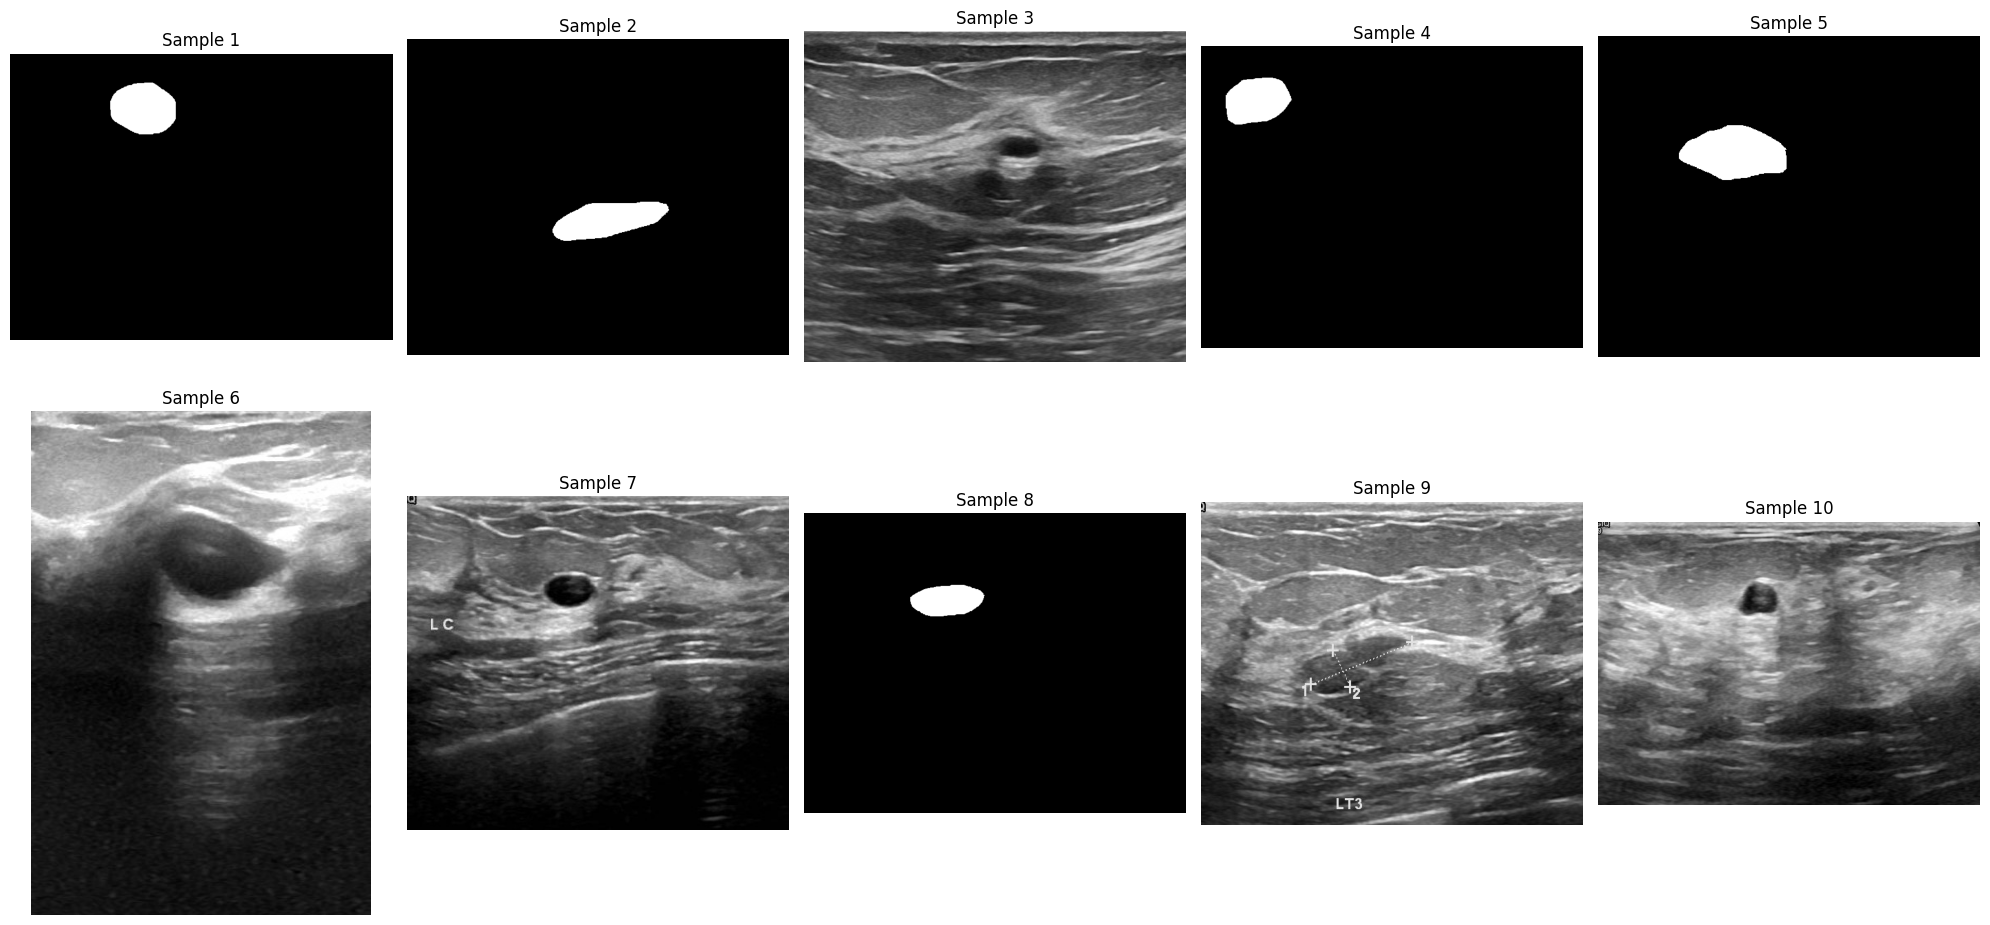

In [83]:
import matplotlib.pyplot as plt
import os
from PIL import Image

# Define the path to the X-ray images directory
xray_images_dir = '/content/xray_images/Dataset_BUSI_with_GT'

# Define the categories and paths
categories = ['benign', 'malignant']
image_files = []
for category in categories:
    category_path = os.path.join(xray_images_dir, category)
    image_files += [os.path.join(category, file) for file in os.listdir(category_path)]

# Display a larger number of sample images
plt.figure(figsize=(20, 10))
for i, image_file in enumerate(image_files[:10]):  # Adjust the range to show more images
    img_path = os.path.join(xray_images_dir, image_file)
    img = Image.open(img_path)
    plt.subplot(2, 5, i + 1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f"Sample {i+1}")

plt.tight_layout()
plt.show()


Found 1263 images belonging to 3 classes.
Found 315 images belonging to 3 classes.
Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 30s 548ms/step - accuracy: 0.3896 - loss: 6.5253 - val_accuracy: 0.5206 - val_loss: 1.5014
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 37s 499ms/step - accuracy: 0.4596 - loss: 1.0335 - val_accuracy: 0.3937 - val_loss: 0.7478
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 483ms/step - accuracy: 0.4162 - loss: 0.7189 - val_accuracy: 0.3968 - val_loss: 0.6678
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 24s 551ms/step - accuracy: 0.3929 - loss: 0.6609 - val_accuracy: 0.4286 - val_loss: 0.6331
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 486ms/step - accuracy: 0.4010 - loss: 0.6674 - val_accuracy: 0.4190 - val_loss: 0.6768
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 24s 527ms/step - accuracy: 0.3925 - loss: 0.6495 - val_accuracy: 0.4063 - val_loss: 0.6452
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 523ms/step - accuracy: 0.3924 - loss: 0.6491 - val_accuracy: 0.4032 - val_loss: 0.6683
Epoch 8/20
40/

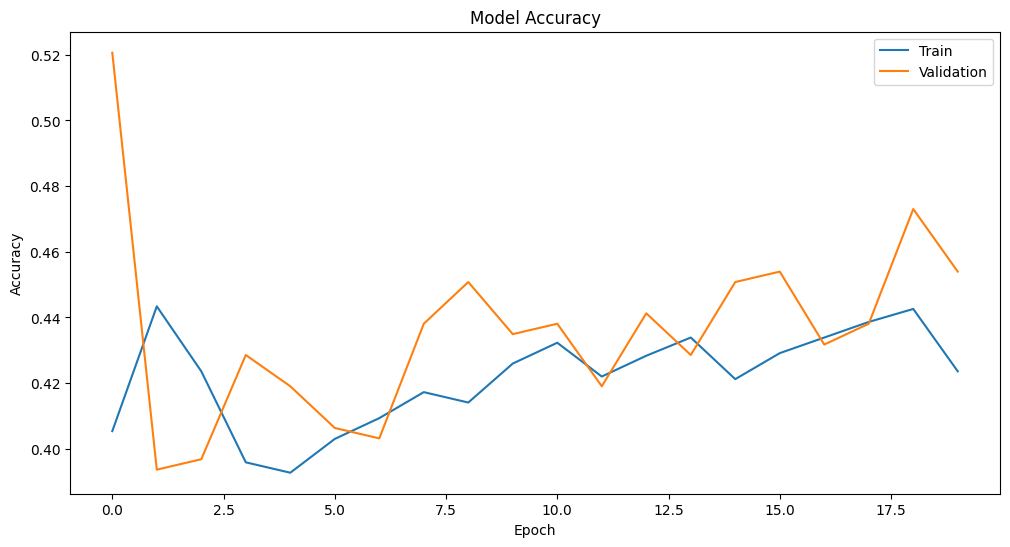

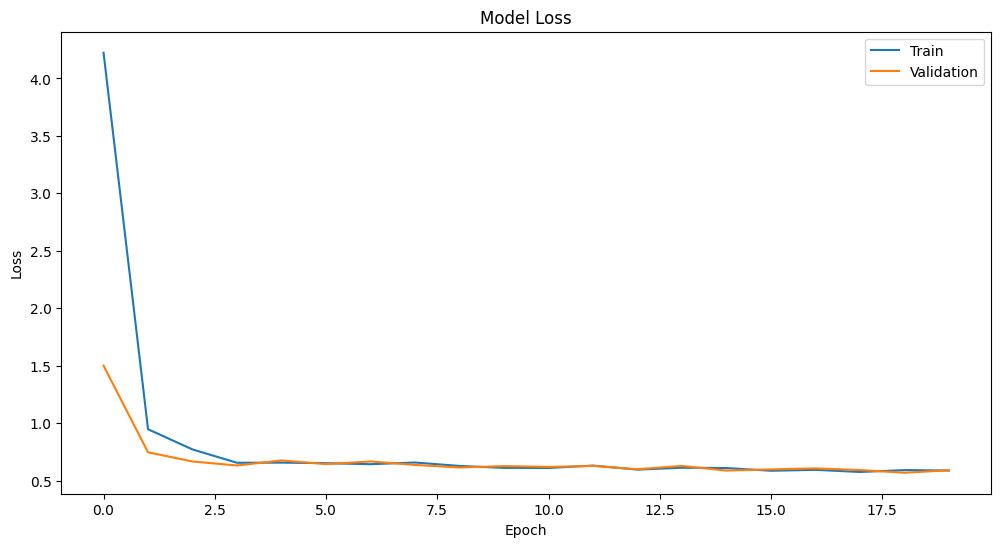

In [91]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the paths to your dataset
train_dir = '/content/xray_images/Dataset_BUSI_with_GT'

# Define image size and batch size
image_size = (150, 150)  # Resize images to this size
batch_size = 32

# Create ImageDataGenerator instances
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Add validation split here
)

# Create train and validation generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

# Define the model
model = Sequential()
model.add(Flatten(input_shape=(150, 150, 3)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator
)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



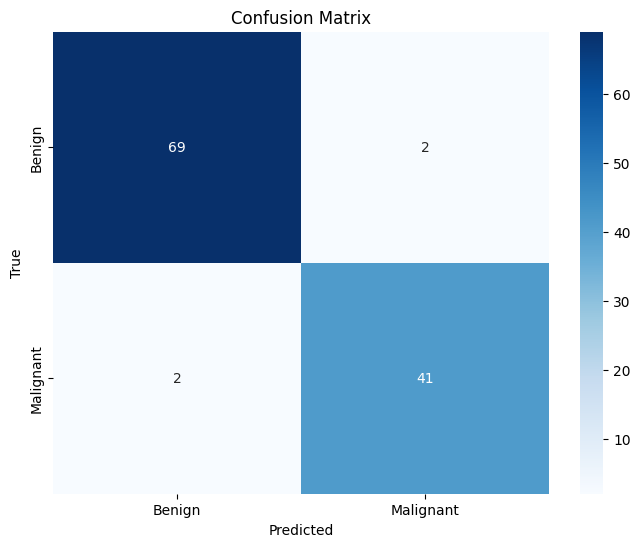

In [86]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predict on the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

# Print classification report
print(classification_report(y_test, y_pred))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


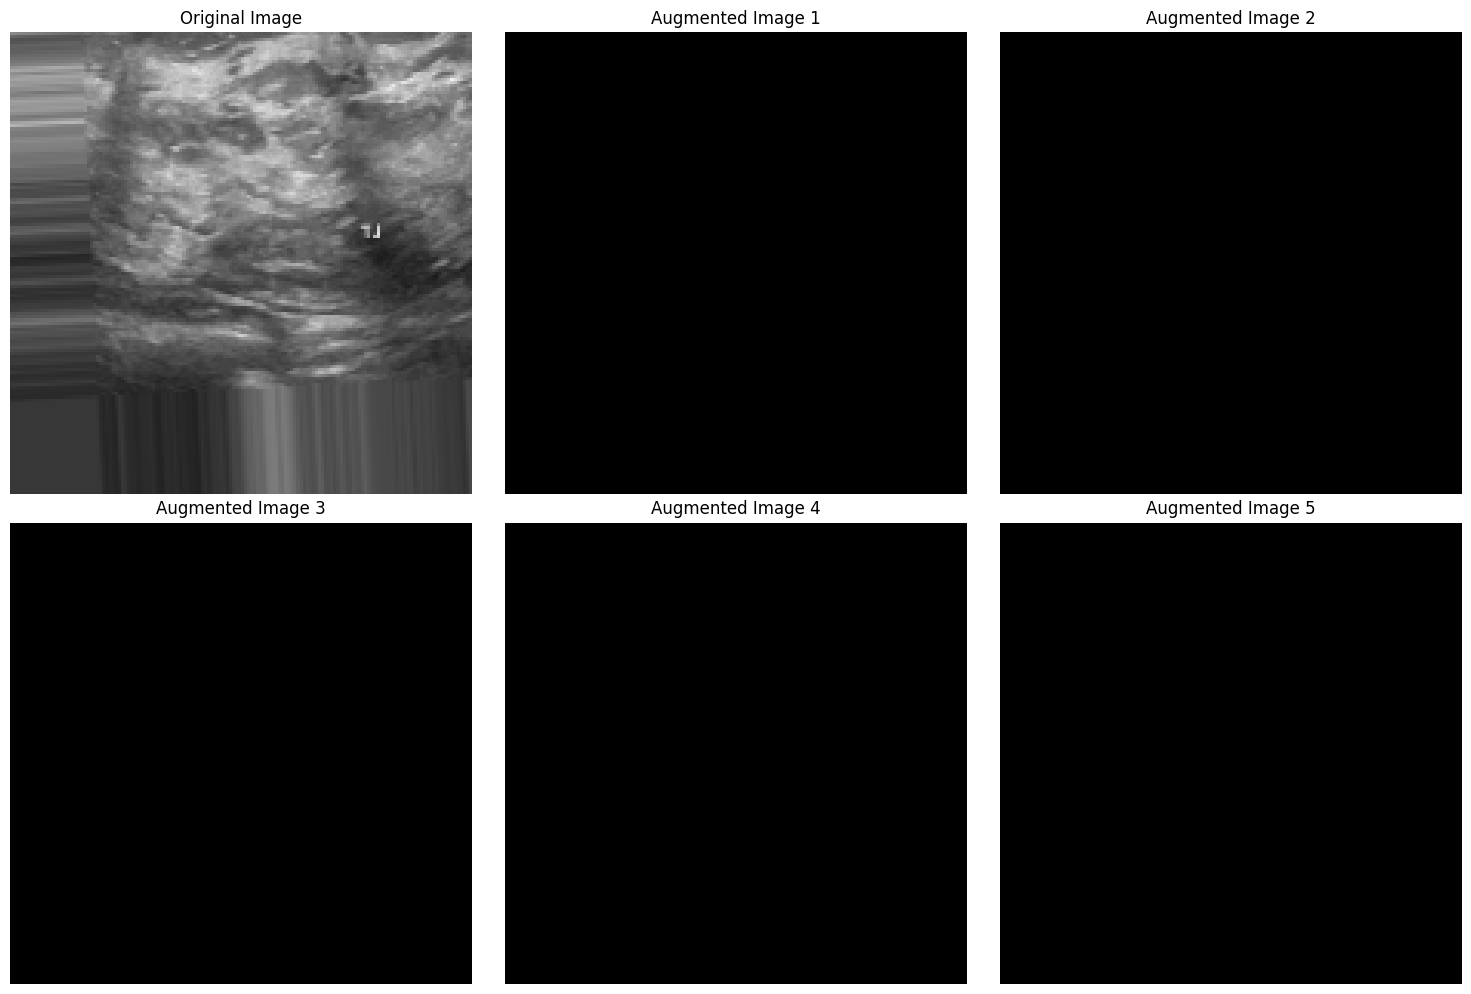

In [106]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

# Create an instance of ImageDataGenerator with augmentation
datagen = ImageDataGenerator(
    rotation_range=40,         # Rotate images by up to 40 degrees
    width_shift_range=0.2,     # Shift images horizontally by up to 20%
    height_shift_range=0.2,    # Shift images vertically by up to 20%
    shear_range=0.2,           # Apply shearing transformation
    zoom_range=0.2,            # Zoom in or out by up to 20%
    horizontal_flip=True,      # Flip images horizontally
    fill_mode='nearest'        # Fill in pixels with nearest value
)

# Take a single image from the dataset
sample_image = next(train_generator)[0][0]  # Take the first image from the first batch

# Reshape the image for augmentation
sample_image = np.expand_dims(sample_image, 0)

# Generate augmented images
augmented_images = [next(datagen.flow(sample_image, batch_size=1))[0].astype(np.uint8) for _ in range(5)]

# Display the original and augmented images
plt.figure(figsize=(15, 10))

# Display the original image
plt.subplot(2, 3, 1)
plt.imshow(sample_image[0])
plt.title('Original Image')
plt.axis('off')

# Display augmented images
for i, img in enumerate(augmented_images):
    plt.subplot(2, 3, i + 2)
    plt.imshow(img)
    plt.title(f'Augmented Image {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()


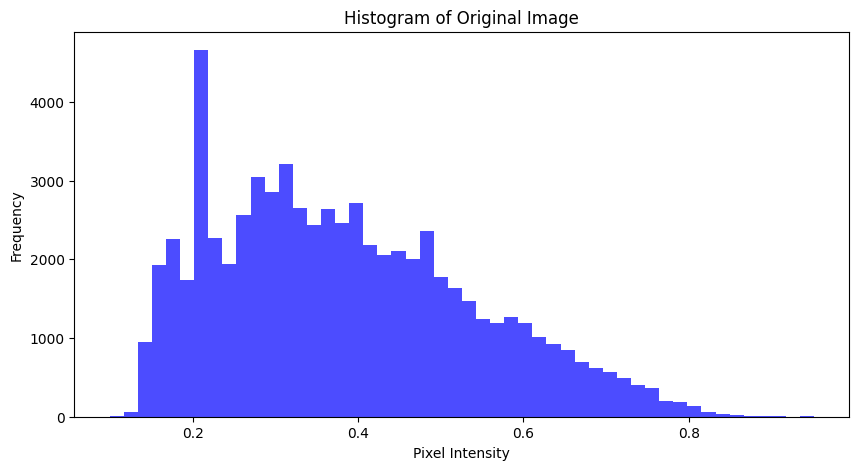

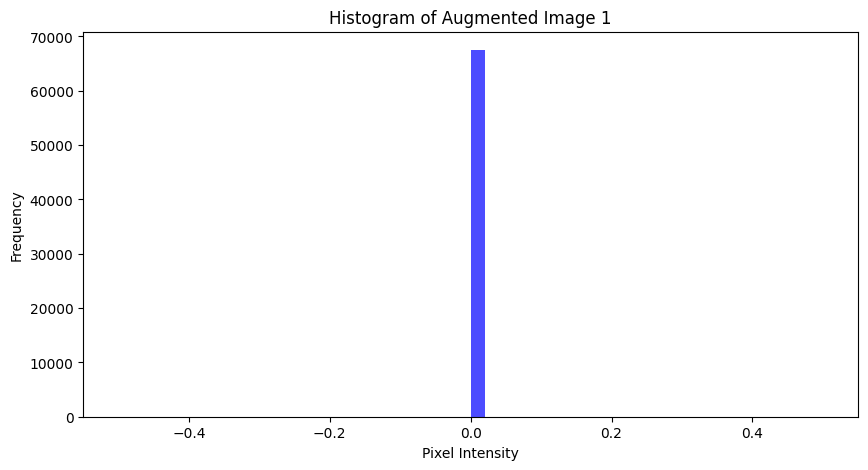

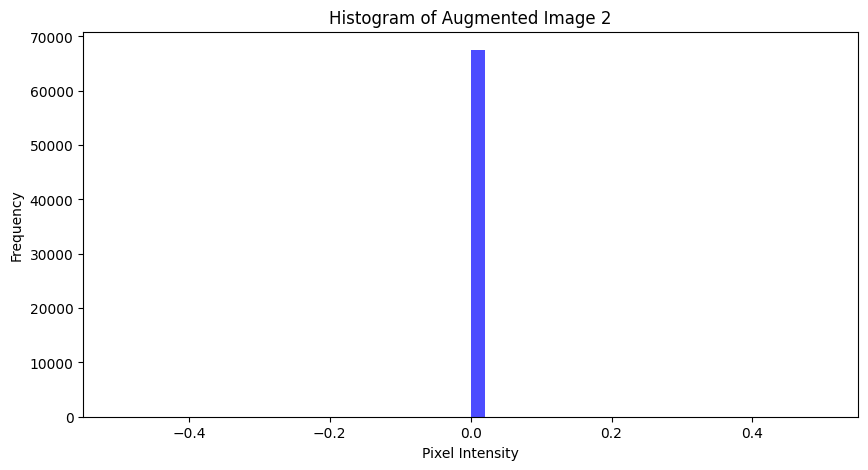

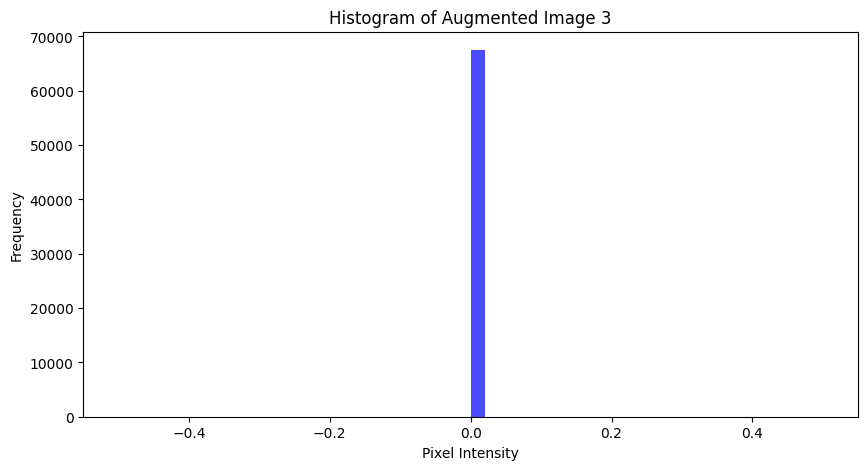

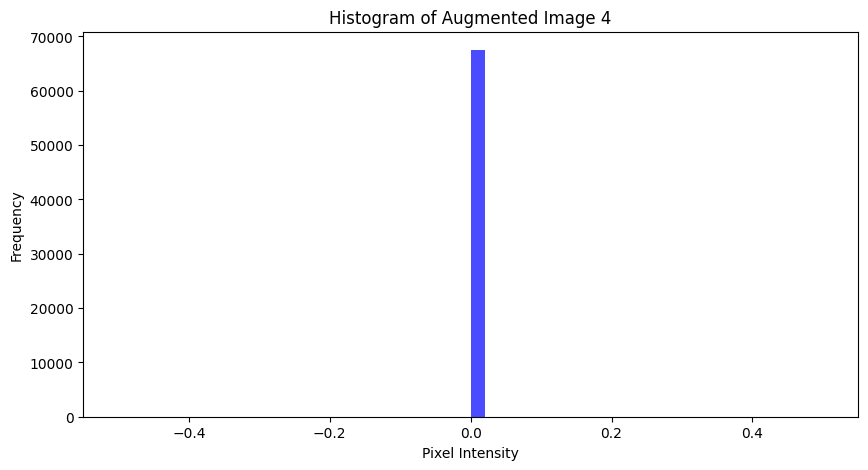

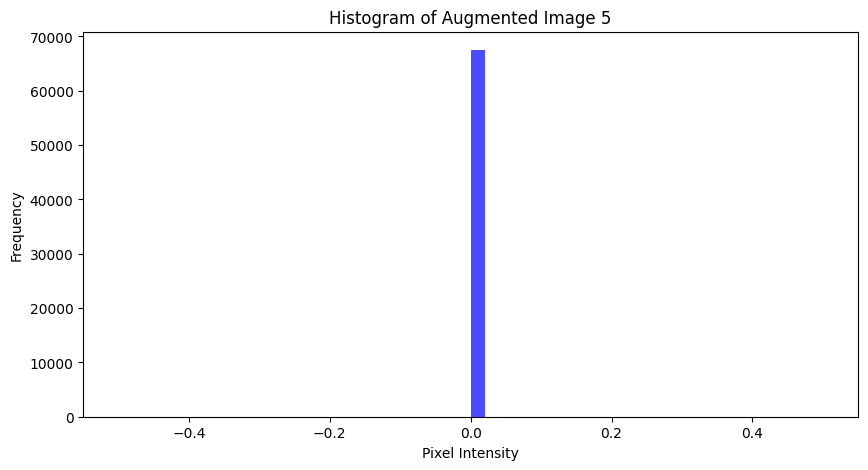

In [107]:
def plot_histogram(image, title='Histogram'):
    plt.figure(figsize=(10, 5))
    plt.hist(image.flatten(), bins=50, color='blue', alpha=0.7)
    plt.title(title)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()

# Plot histogram for the original image
plot_histogram(sample_image[0], title='Histogram of Original Image')

# Plot histograms for augmented images
for i, img in enumerate(augmented_images):
    plot_histogram(img, title=f'Histogram of Augmented Image {i+1}')


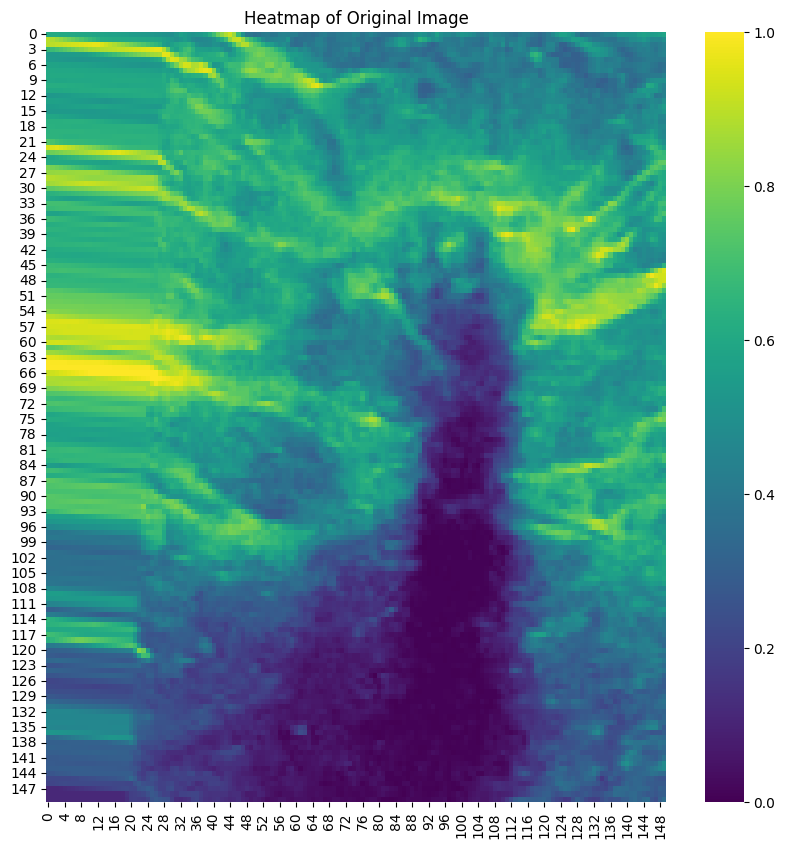

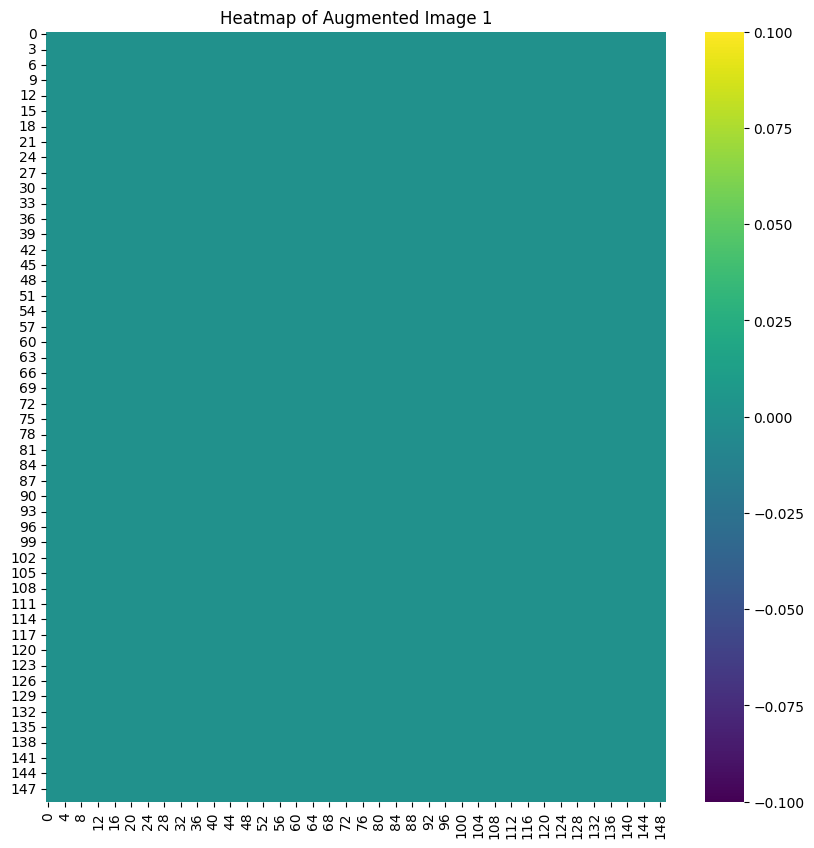

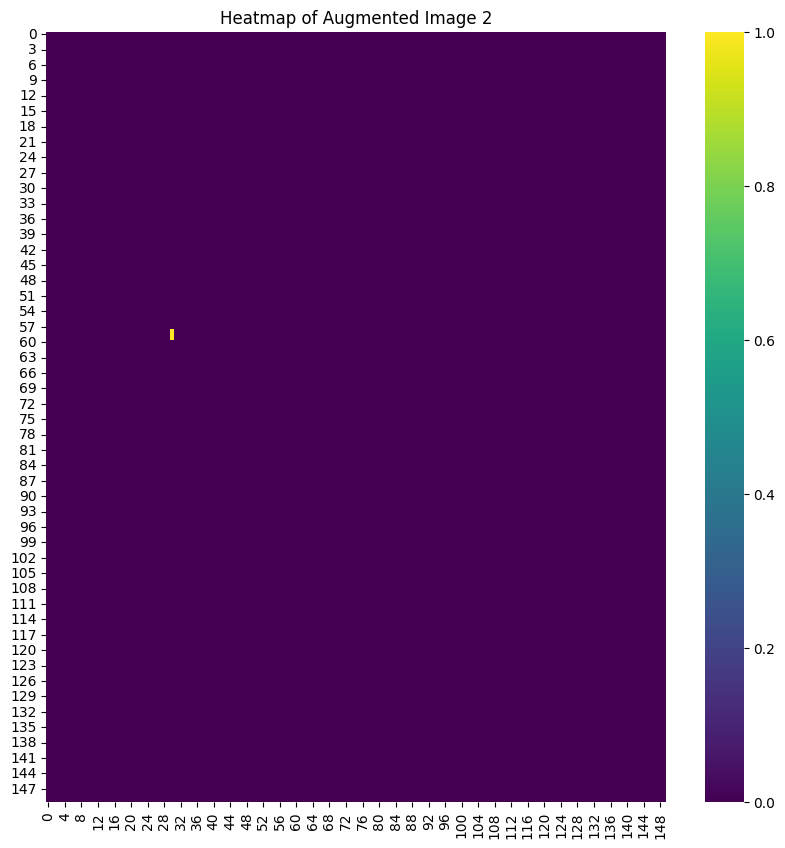

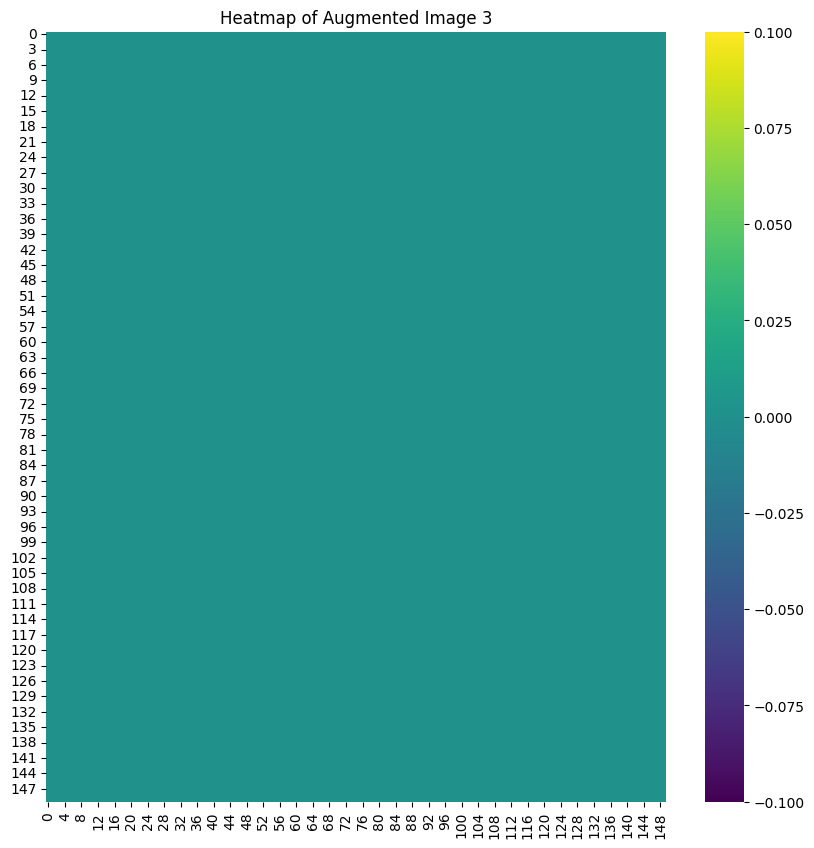

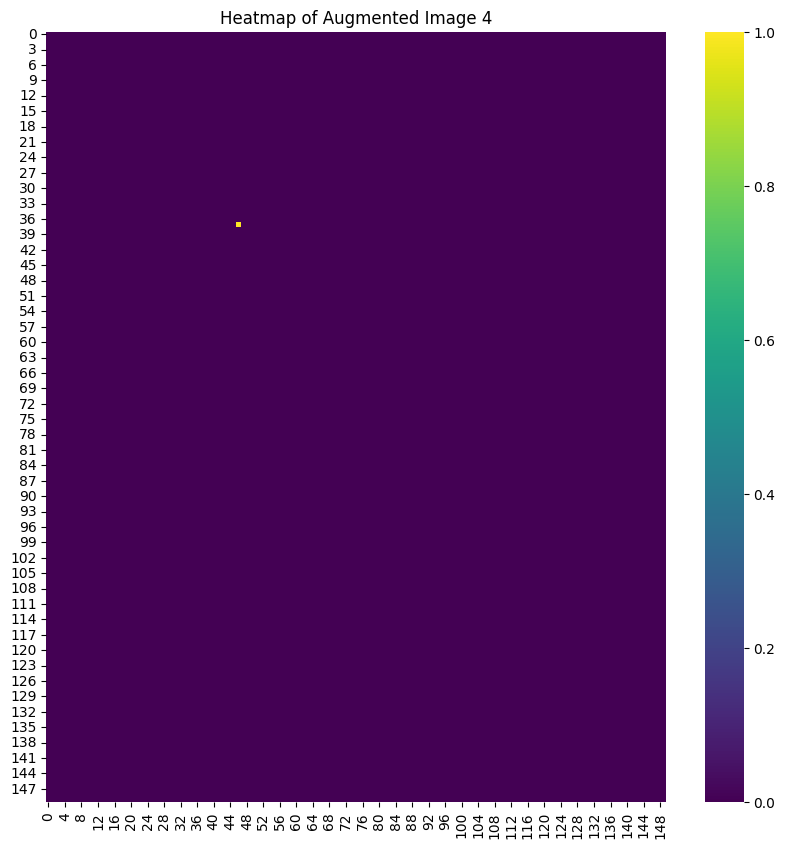

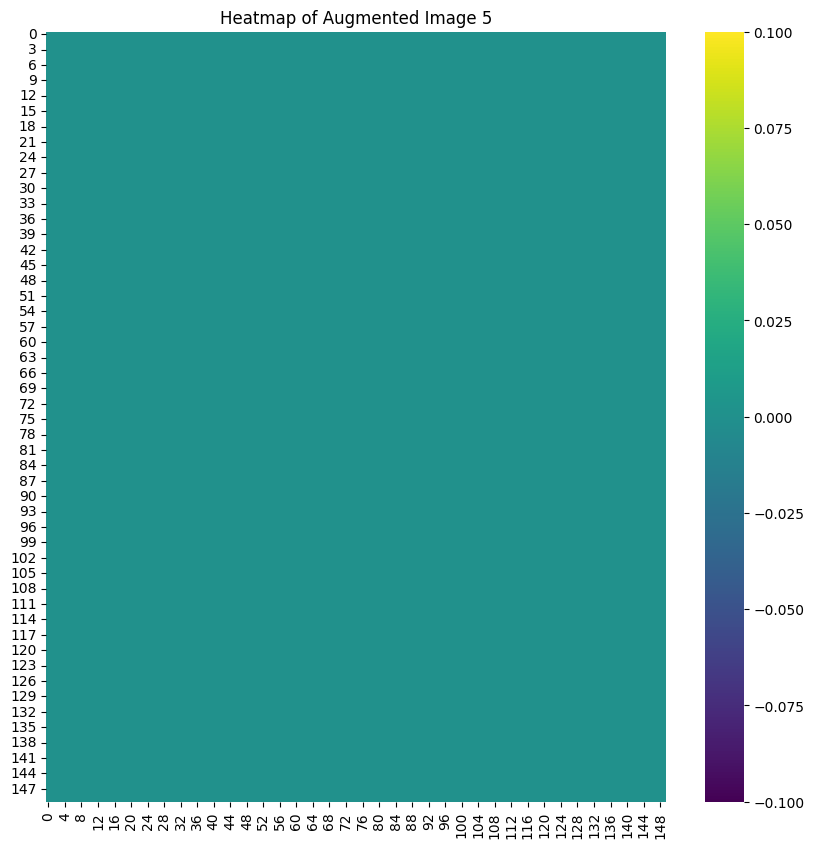

In [102]:
import seaborn as sns

def plot_heatmap(image, title='Heatmap'):
    plt.figure(figsize=(10, 10))
    sns.heatmap(image[:, :, 0], cmap='viridis')  # Assuming single channel for simplicity
    plt.title(title)
    plt.show()

# Plot heatmap for the original image
plot_heatmap(sample_image[0], title='Heatmap of Original Image')

# Plot heatmaps for augmented images
for i, img in enumerate(augmented_images):
    plot_heatmap(img, title=f'Heatmap of Augmented Image {i+1}')


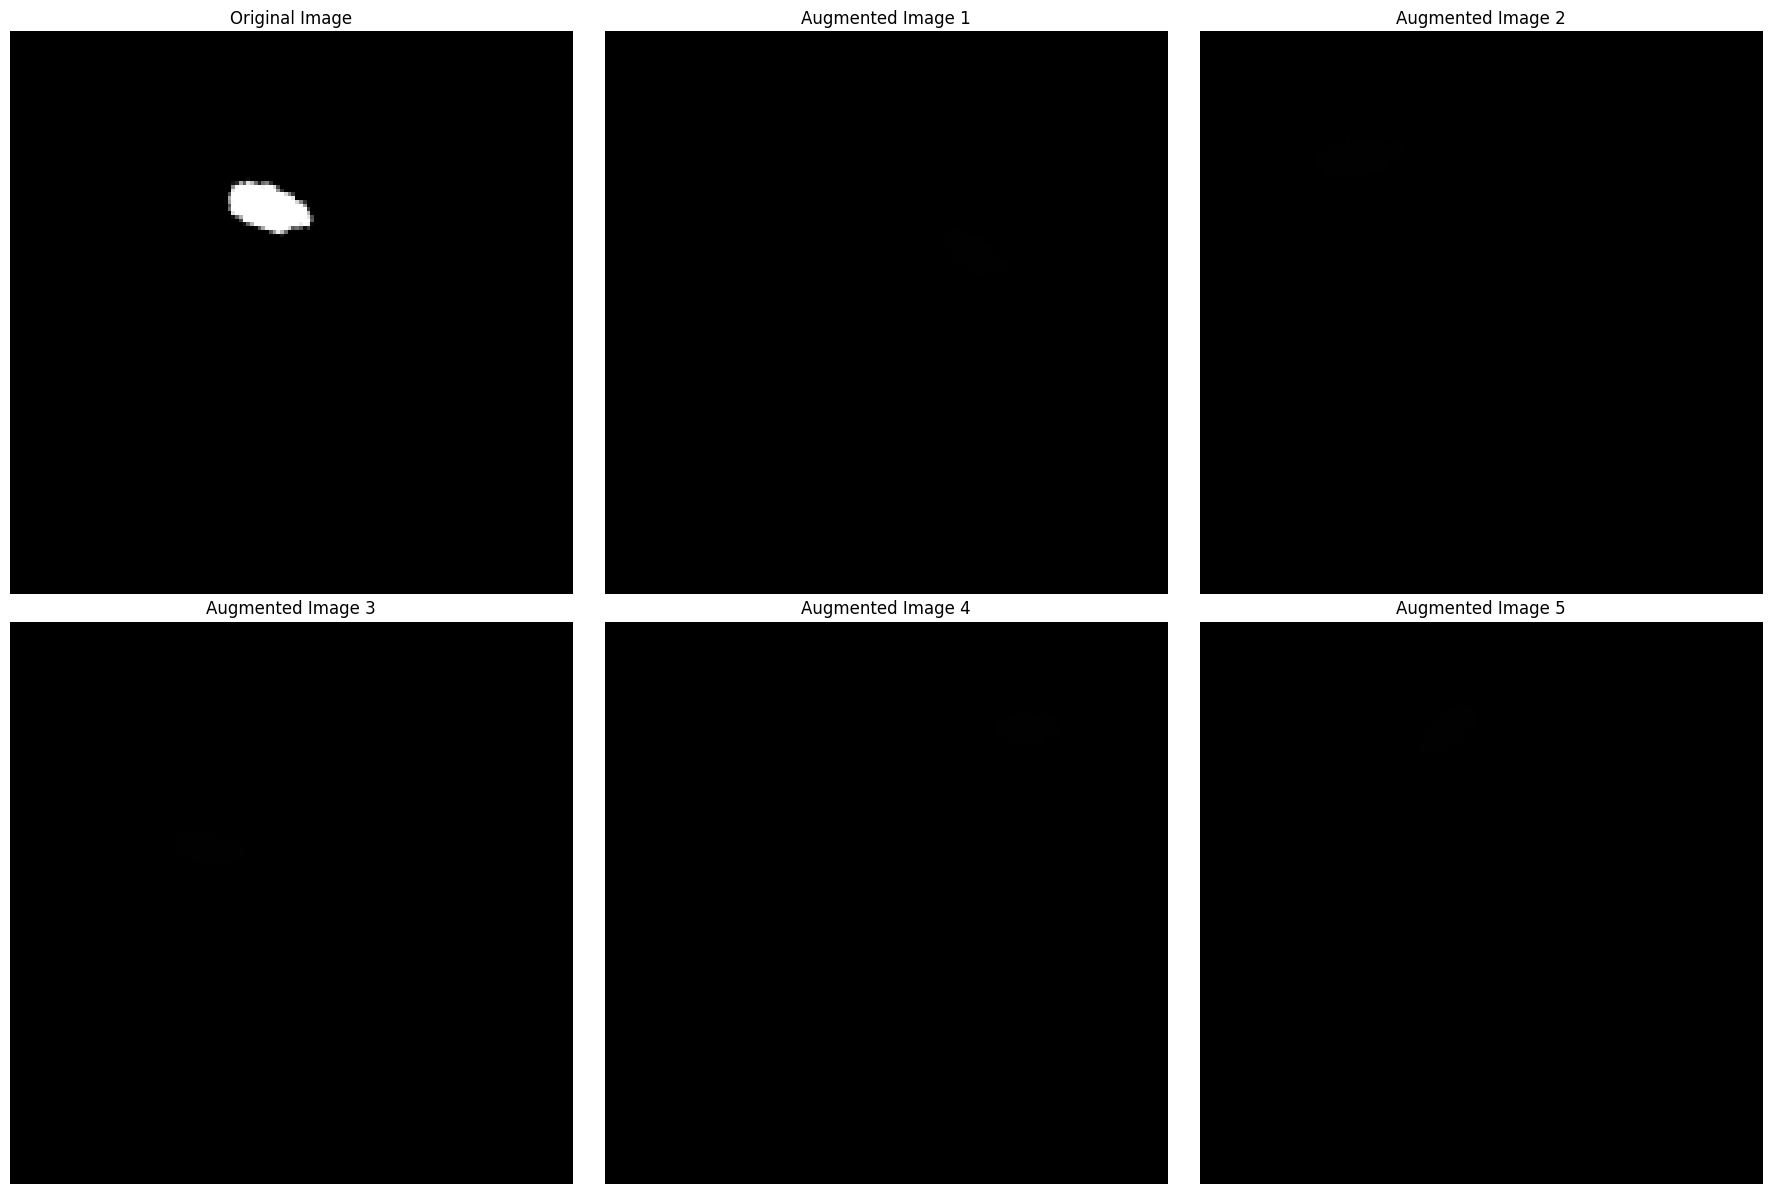

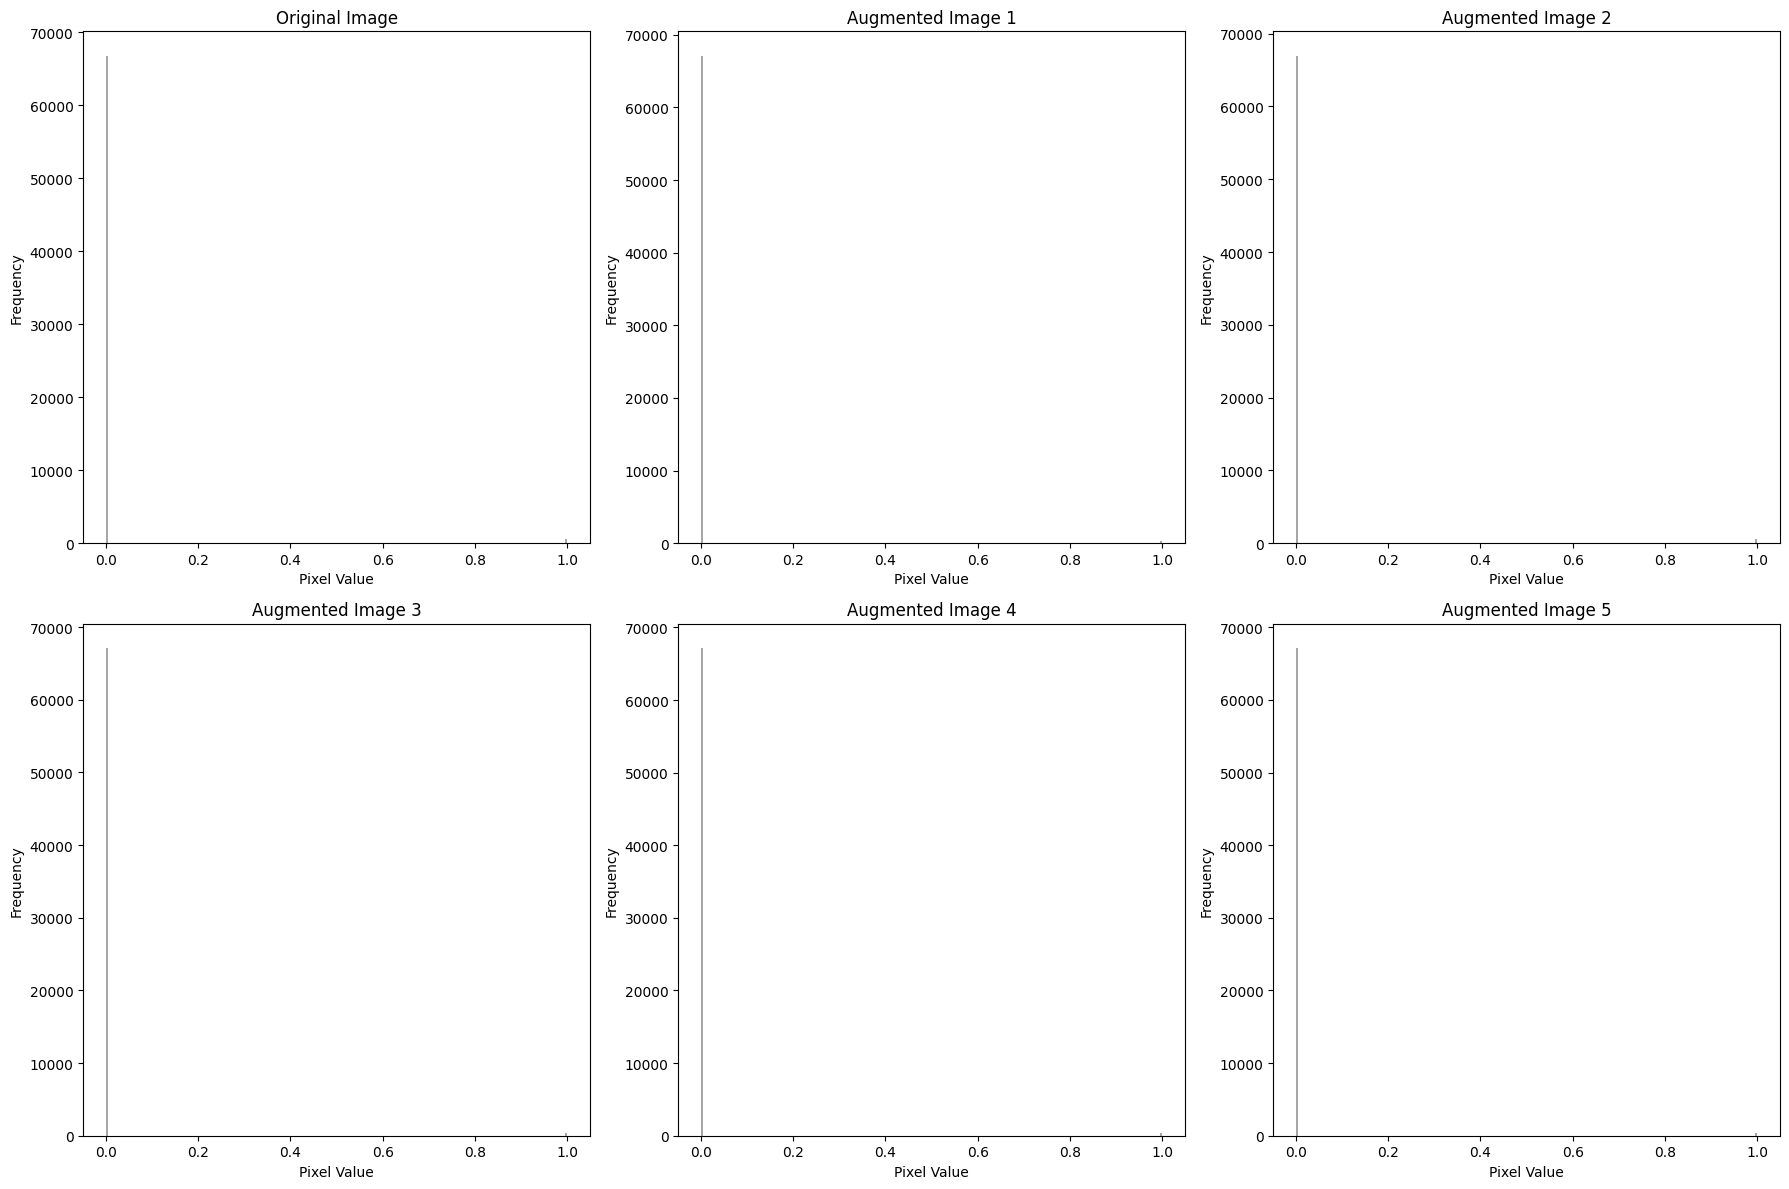

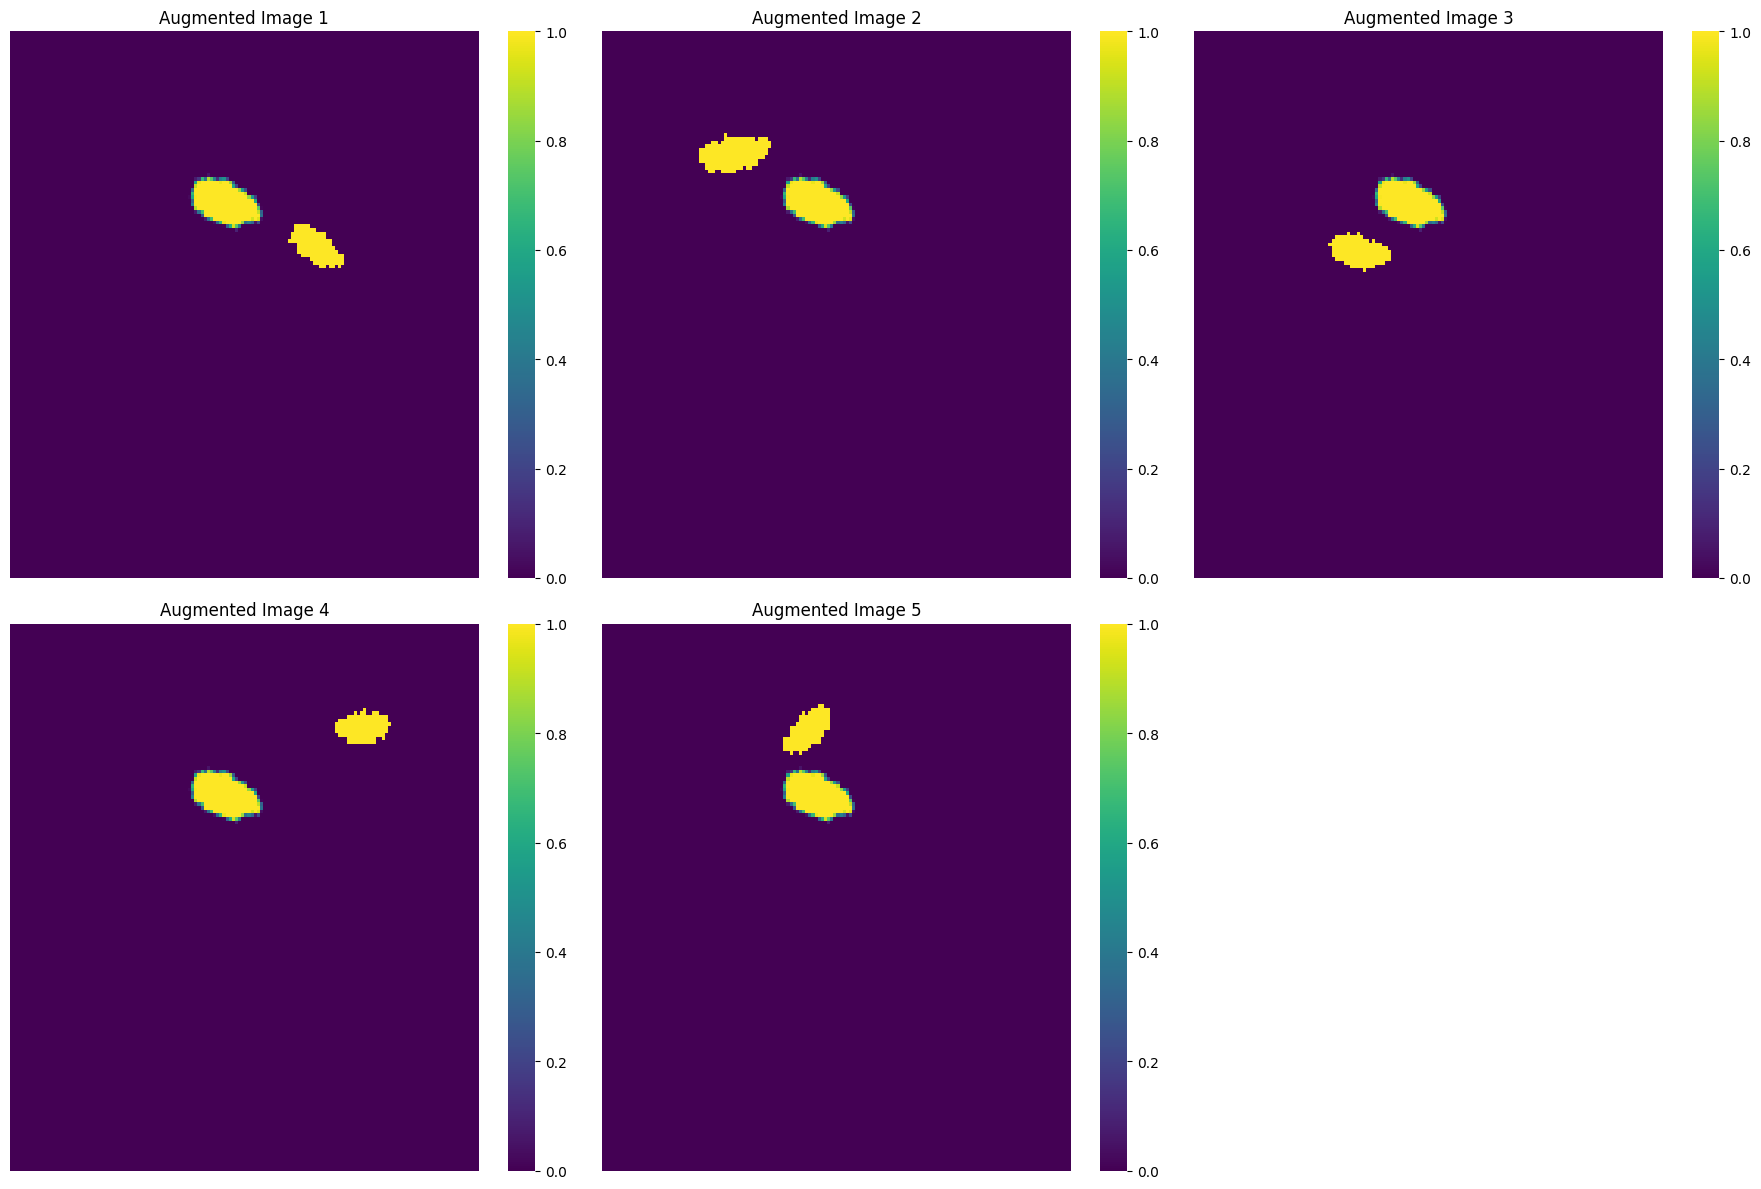

In [109]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Take a single image from the dataset
sample_image = next(train_generator)[0][0]  # Take the first image from the first batch

# Reshape the image for augmentation
sample_image = np.expand_dims(sample_image, 0)

# Generate augmented images
augmented_images = [next(datagen.flow(sample_image, batch_size=1))[0].astype(np.uint8) for _ in range(5)]

# Function to plot side-by-side transformations
def plot_transformations(images, titles, figsize=(18, 12)):
    plt.figure(figsize=figsize)
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(2, 3, i + 1)
        plt.imshow(img)
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Function to plot histograms
def plot_histograms(images, titles, figsize=(18, 12)):
    plt.figure(figsize=figsize)
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(2, 3, i + 1)
        plt.hist(img.ravel(), bins=256, color='gray', alpha=0.7)
        plt.title(title)
        plt.xlabel('Pixel Value')
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Function to calculate and plot heatmap of pixel changes
def plot_heatmaps(original_img, augmented_imgs, titles, figsize=(18, 12)):
    plt.figure(figsize=figsize)
    for i, (aug_img, title) in enumerate(zip(augmented_imgs, titles)):
        diff = np.abs(original_img - aug_img)
        plt.subplot(2, 3, i + 1)
        sns.heatmap(diff[:, :, 0], cmap='viridis', cbar=True)
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Plot original and augmented images
plot_transformations([sample_image[0]] + augmented_images, ['Original Image'] + [f'Augmented Image {i+1}' for i in range(5)])

# Plot histograms of pixel values
plot_histograms([sample_image[0]] + augmented_images, ['Original Image'] + [f'Augmented Image {i+1}' for i in range(5)])

# Plot heatmaps of pixel changes
plot_heatmaps(sample_image[0], augmented_images, [f'Augmented Image {i+1}' for i in range(5)])


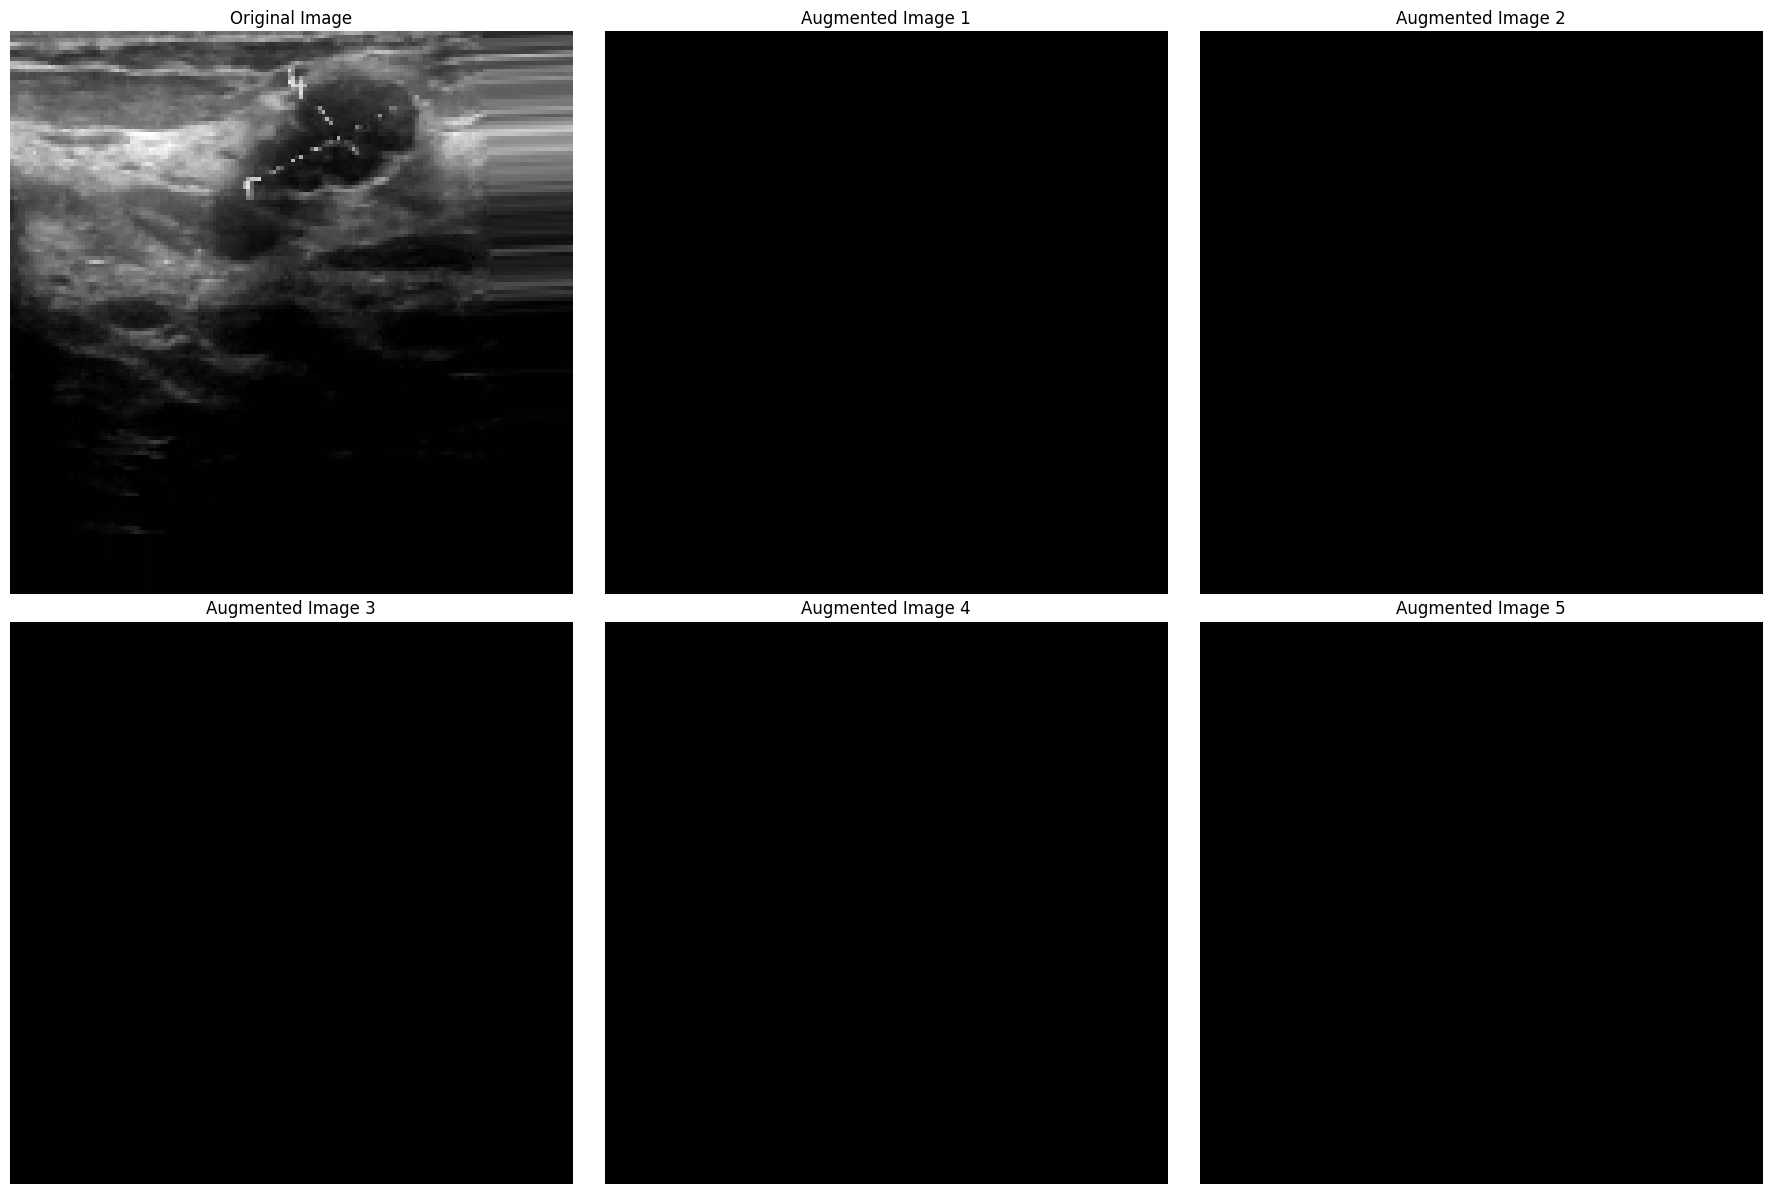

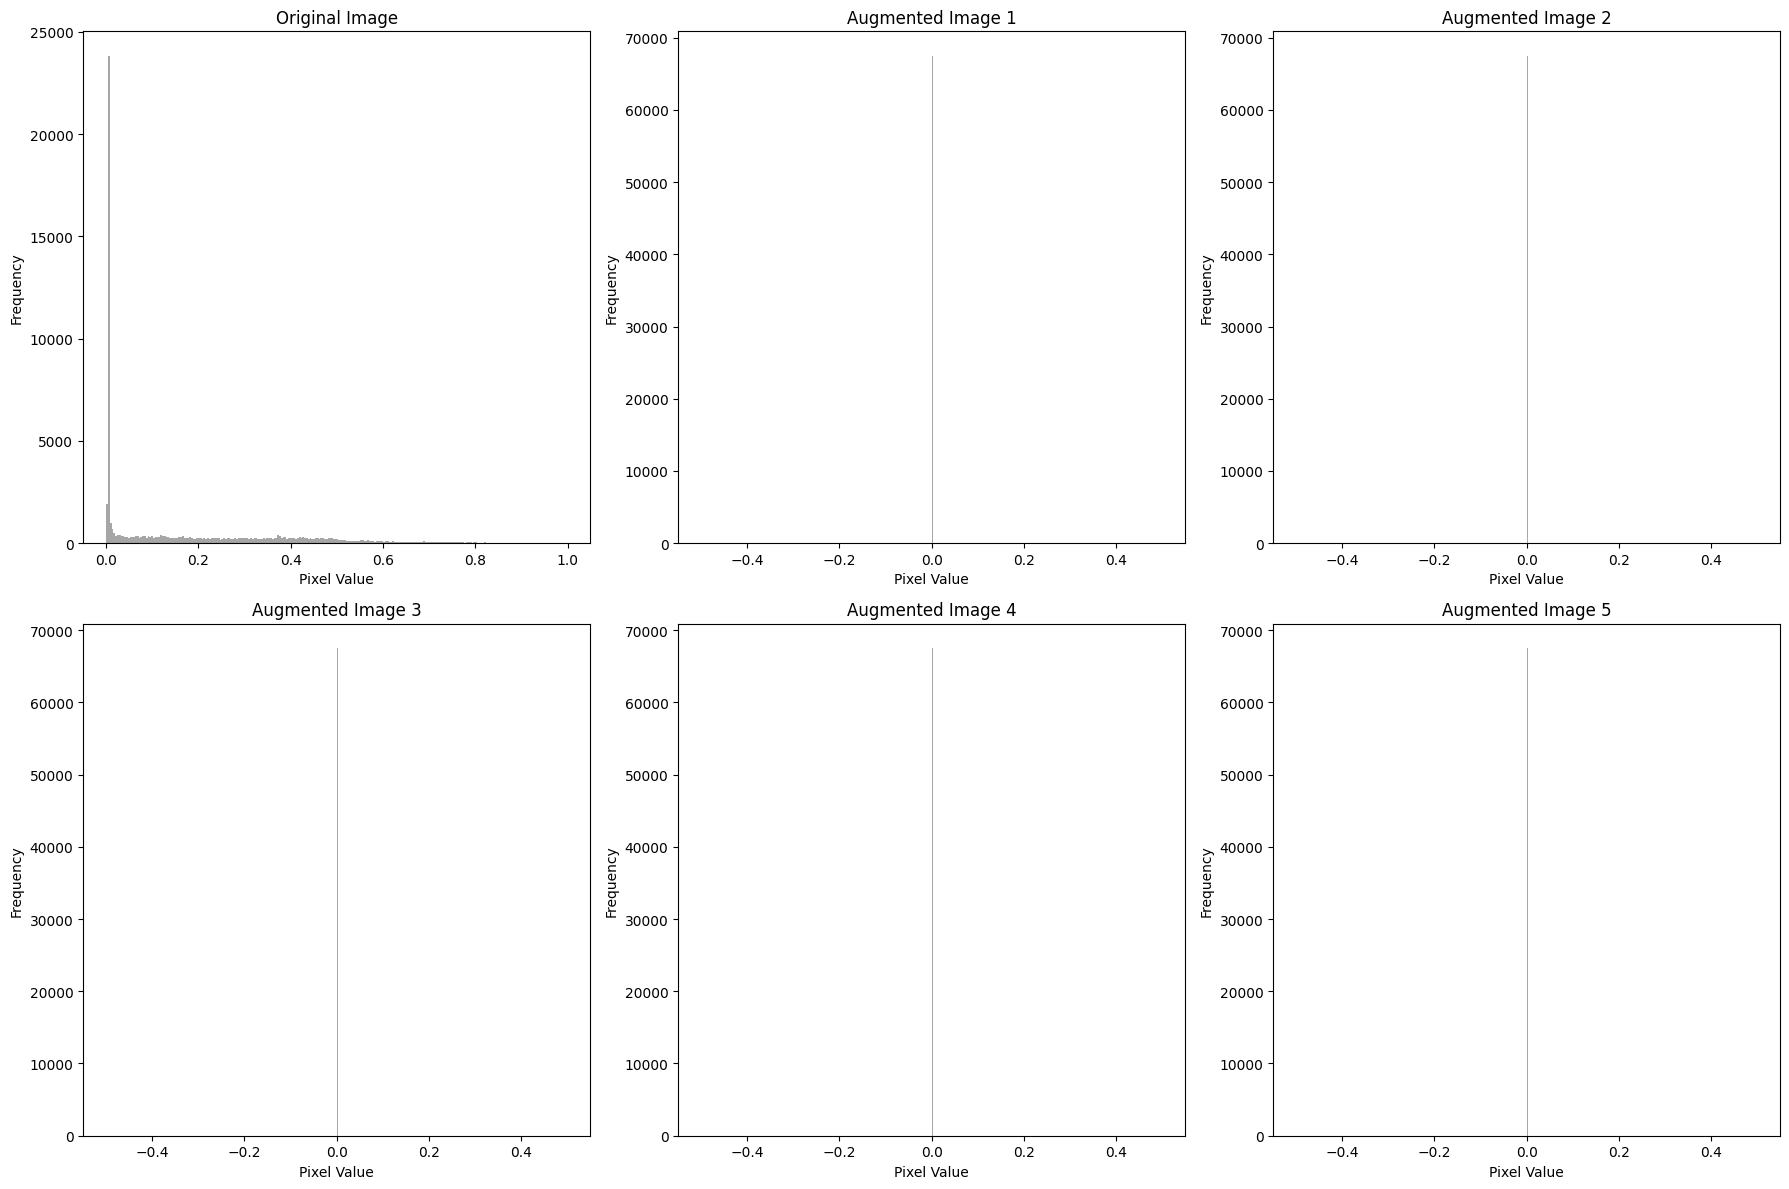

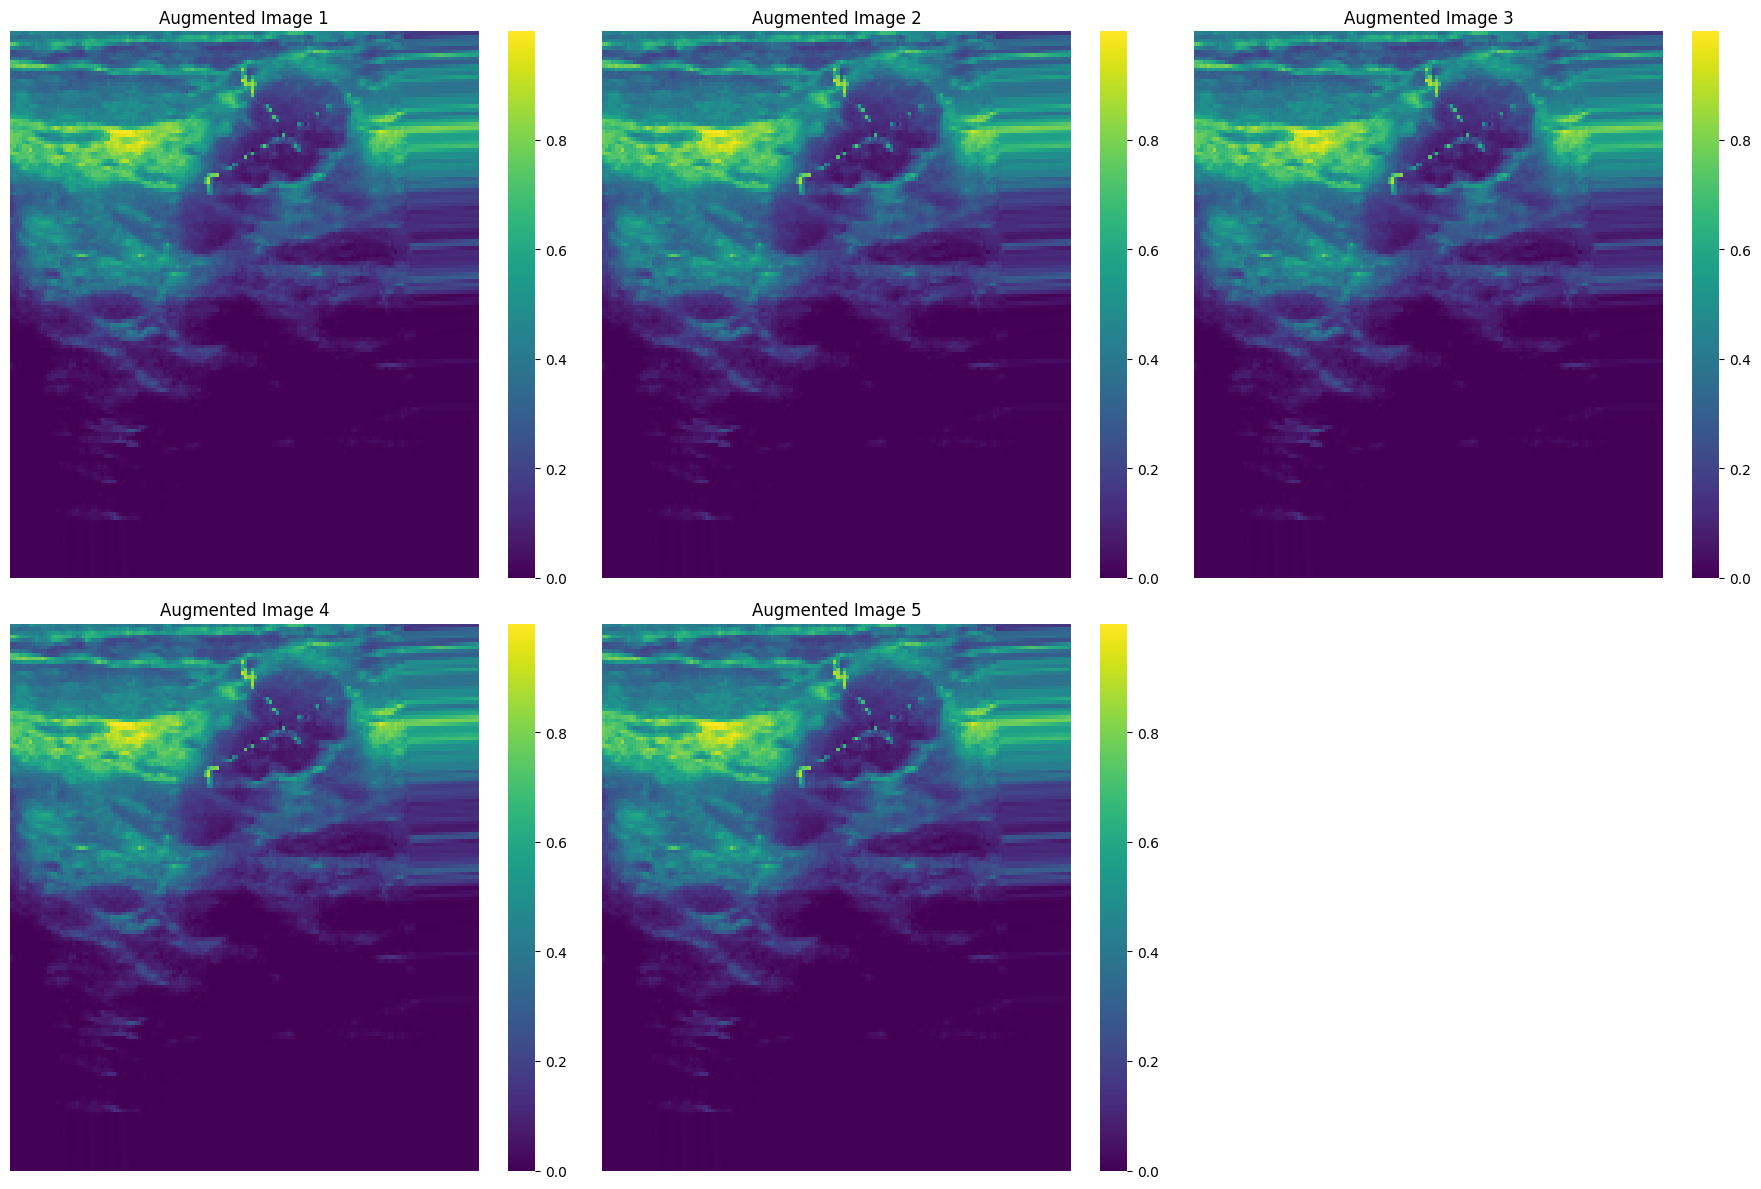

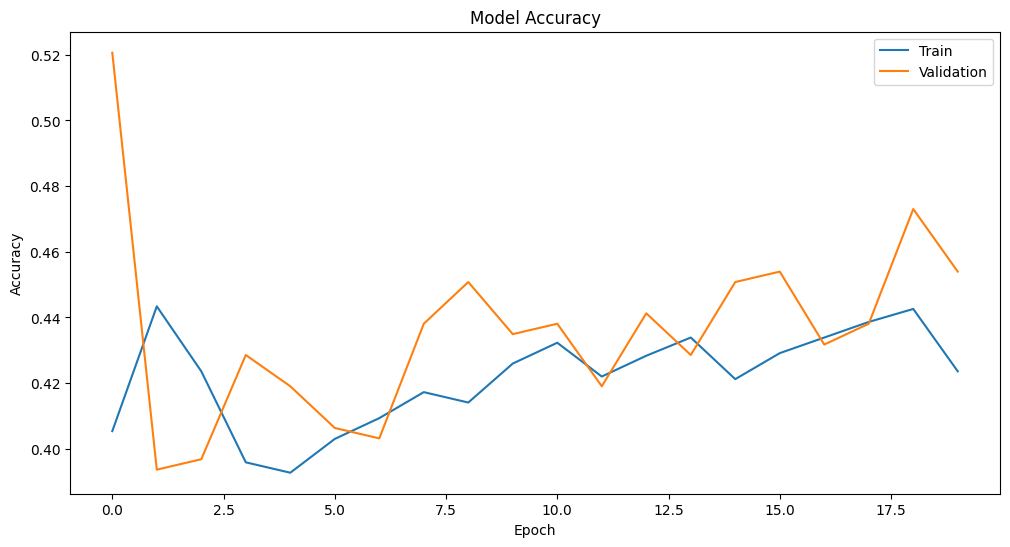

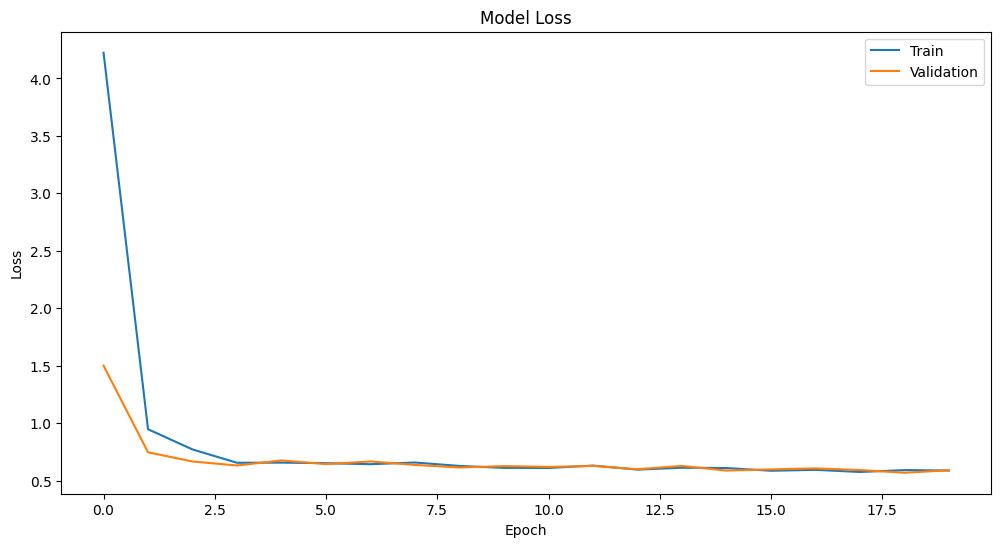

10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 390ms/step


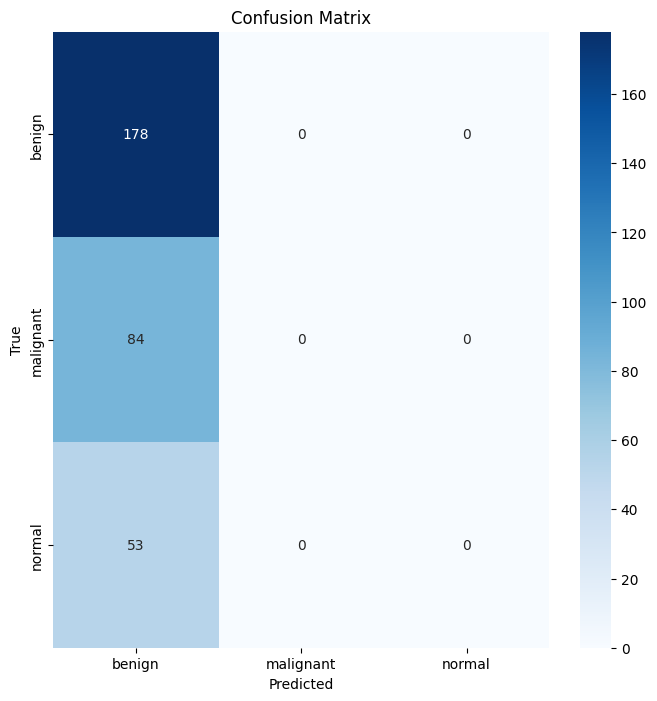

Classification Report:
              precision    recall  f1-score   support

           0       0.57      1.00      0.72       178
           1       0.00      0.00      0.00        84
           2       0.00      0.00      0.00        53

    accuracy                           0.57       315
   macro avg       0.19      0.33      0.24       315
weighted avg       0.32      0.57      0.41       315



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [110]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

# Assuming `history` is the training history of your model
# and `model` is the trained model

# 1. Show Original and Augmented Images
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

sample_image = next(train_generator)[0][0]  # Take the first image from the first batch
sample_image = np.expand_dims(sample_image, 0)
augmented_images = [next(datagen.flow(sample_image, batch_size=1))[0].astype(np.uint8) for _ in range(5)]

# Plot original and augmented images
def plot_transformations(images, titles, figsize=(18, 12)):
    plt.figure(figsize=figsize)
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(2, 3, i + 1)
        plt.imshow(img)
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Plot histograms of pixel values
def plot_histograms(images, titles, figsize=(18, 12)):
    plt.figure(figsize=figsize)
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(2, 3, i + 1)
        plt.hist(img.ravel(), bins=256, color='gray', alpha=0.7)
        plt.title(title)
        plt.xlabel('Pixel Value')
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Function to calculate and plot heatmap of pixel changes
def plot_heatmaps(original_img, augmented_imgs, titles, figsize=(18, 12)):
    plt.figure(figsize=figsize)
    for i, (aug_img, title) in enumerate(zip(augmented_imgs, titles)):
        diff = np.abs(original_img - aug_img)
        plt.subplot(2, 3, i + 1)
        sns.heatmap(diff[:, :, 0], cmap='viridis', cbar=True)
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Plot original and augmented images
plot_transformations([sample_image[0]] + augmented_images, ['Original Image'] + [f'Augmented Image {i+1}' for i in range(5)])

# Plot histograms of pixel values
plot_histograms([sample_image[0]] + augmented_images, ['Original Image'] + [f'Augmented Image {i+1}' for i in range(5)])

# Plot heatmaps of pixel changes
plot_heatmaps(sample_image[0], augmented_images, [f'Augmented Image {i+1}' for i in range(5)])


# 2. Model Performance Metrics

# Assuming `history` contains the training history
# Plot training & validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

# Plot training & validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

# Confusion Matrix
# Assuming you have predictions from the model
y_pred = model.predict(val_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = val_generator.classes

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=val_generator.class_indices.keys(), yticklabels=val_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes))
